## Sales Performance Analysis

### Objective
### Analyze sales data to identify revenue distribution across cities and products,
### and derive actionable business insights.


## 1.Dataset overview Section
### • Number of rows = 8
### • Number of columns = 8
### • Key Columns (City, Product, Revenue, Quantity)

In [2]:
import pandas as pd
from io import StringIO

data = """OrderID,Date,City,Product,Category,Quantity,UnitPrice,Discount
1001,2024-01-05,Delhi,Laptop,Electronics,1,55000,0.05
1002,2024-01-06,Mumbai,Phone,Electronics,2,25000,
1003,2024-01-07,Delhi,Tablet,Electronics,,18000,0.10
1004,2024-01-08,Bangalore,Laptop,Electronics,1,56000,0.03
1005,2024-01-09,Mumbai,Headphones,Accessories,3,3000,0.00
1006,2024-01-10,Delhi,Phone,Electronics,1,26000,0.07
1007,2024-01-11,Bangalore,Tablet,Electronics,2,17500,
1008,2024-01-12,Mumbai,Laptop,Electronics,1,54000,0.05

"""

In [3]:
df = pd.read_csv(StringIO(data), sep=",")

In [4]:
df

,OrderID,Date,City,Product,Category,Quantity,UnitPrice,Discount
0,1001,2024-01-05,Delhi,Laptop,Electronics,1.0,55000,0.05
1,1002,2024-01-06,Mumbai,Phone,Electronics,2.0,25000,NaN
2,1003,2024-01-07,Delhi,Tablet,Electronics,NaN,18000,0.10
3,1004,2024-01-08,Bangalore,Laptop,Electronics,1.0,56000,0.03
4,1005,2024-01-09,Mumbai,Headphones,Accessories,3.0,3000,0.00
5,1006,2024-01-10,Delhi,Phone,Electronics,1.0,26000,0.07
6,1007,2024-01-11,Bangalore,Tablet,Electronics,2.0,17500,NaN
7,1008,2024-01-12,Mumbai,Laptop,Electronics,1.0,54000,0.05


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OrderID    8 non-null      int64  
 1   Date       8 non-null      object 
 2   City       8 non-null      object 
 3   Product    8 non-null      object 
 4   Category   8 non-null      object 
 5   Quantity   7 non-null      float64
 6   UnitPrice  8 non-null      int64  
 7   Discount   6 non-null      float64
dtypes: float64(2), int64(2), object(4)
memory usage: 644.0+ bytes


### Check missing values

In [6]:
df.isnull().sum()

OrderID      0
Date         0
City         0
Product      0
Category     0
Quantity     1
UnitPrice    0
Discount     2
dtype: int64

In [7]:
df.shape

(8, 8)

##  Data Cleaning
### • Filled missing Discount values with 0 assuming no discount was applied

In [8]:
df["Discount"] = df["Discount"].fillna(0)

In [9]:
df

,OrderID,Date,City,Product,Category,Quantity,UnitPrice,Discount
0,1001,2024-01-05,Delhi,Laptop,Electronics,1.0,55000,0.05
1,1002,2024-01-06,Mumbai,Phone,Electronics,2.0,25000,0.00
2,1003,2024-01-07,Delhi,Tablet,Electronics,NaN,18000,0.10
3,1004,2024-01-08,Bangalore,Laptop,Electronics,1.0,56000,0.03
4,1005,2024-01-09,Mumbai,Headphones,Accessories,3.0,3000,0.00
5,1006,2024-01-10,Delhi,Phone,Electronics,1.0,26000,0.07
6,1007,2024-01-11,Bangalore,Tablet,Electronics,2.0,17500,0.00
7,1008,2024-01-12,Mumbai,Laptop,Electronics,1.0,54000,0.05


### Filled missing Quantity with 1 to avoid revenue loss

In [10]:
df["Quantity"] = df["Quantity"].fillna(1)

In [11]:
df

,OrderID,Date,City,Product,Category,Quantity,UnitPrice,Discount
0,1001,2024-01-05,Delhi,Laptop,Electronics,1.0,55000,0.05
1,1002,2024-01-06,Mumbai,Phone,Electronics,2.0,25000,0.00
2,1003,2024-01-07,Delhi,Tablet,Electronics,1.0,18000,0.10
3,1004,2024-01-08,Bangalore,Laptop,Electronics,1.0,56000,0.03
4,1005,2024-01-09,Mumbai,Headphones,Accessories,3.0,3000,0.00
5,1006,2024-01-10,Delhi,Phone,Electronics,1.0,26000,0.07
6,1007,2024-01-11,Bangalore,Tablet,Electronics,2.0,17500,0.00
7,1008,2024-01-12,Mumbai,Laptop,Electronics,1.0,54000,0.05


### Created Revenue column as Quantity × UnitPrice × (1 - Discount) to calculate actual sales value after applying discounts

In [12]:
df["Revenue"] = df["Quantity"] * df["UnitPrice"] * (1 - df["Discount"])

In [13]:
df

,OrderID,Date,City,Product,Category,Quantity,UnitPrice,Discount,Revenue
0,1001,2024-01-05,Delhi,Laptop,Electronics,1.0,55000,0.05,52250.0
1,1002,2024-01-06,Mumbai,Phone,Electronics,2.0,25000,0.00,50000.0
2,1003,2024-01-07,Delhi,Tablet,Electronics,1.0,18000,0.10,16200.0
3,1004,2024-01-08,Bangalore,Laptop,Electronics,1.0,56000,0.03,54320.0
4,1005,2024-01-09,Mumbai,Headphones,Accessories,3.0,3000,0.00,9000.0
5,1006,2024-01-10,Delhi,Phone,Electronics,1.0,26000,0.07,24180.0
6,1007,2024-01-11,Bangalore,Tablet,Electronics,2.0,17500,0.00,35000.0
7,1008,2024-01-12,Mumbai,Laptop,Electronics,1.0,54000,0.05,51300.0


### Calculated total revenue for each city to analyze city-wise sales contribution

In [14]:
total_revenue_byCity = df.groupby("City")["Revenue"].sum()

In [15]:
total_revenue_byCity

City
Bangalore     89320.0
Delhi         92630.0
Mumbai       110300.0
Name: Revenue, dtype: float64

### Calculated total revenue for each product to analyze product-wise sales performance

In [16]:
total_revenue_byProduct = df.groupby("Product")["Revenue"].sum()

In [17]:
total_revenue_byProduct

Product
Headphones      9000.0
Laptop        157870.0
Phone          74180.0
Tablet         51200.0
Name: Revenue, dtype: float64

### Identified the city with the highest total revenue


In [18]:
city_with_hst_revenue = df.groupby("City")["Revenue"].sum()
city_with_hst_revenue

City
Bangalore     89320.0
Delhi         92630.0
Mumbai       110300.0
Name: Revenue, dtype: float64

### Retrieved the city contributing the highest revenue

In [20]:
top_revenue_city = total_revenue_byProduct.idxmax()
top_revenue_city

'Laptop'

## Data Visualization 

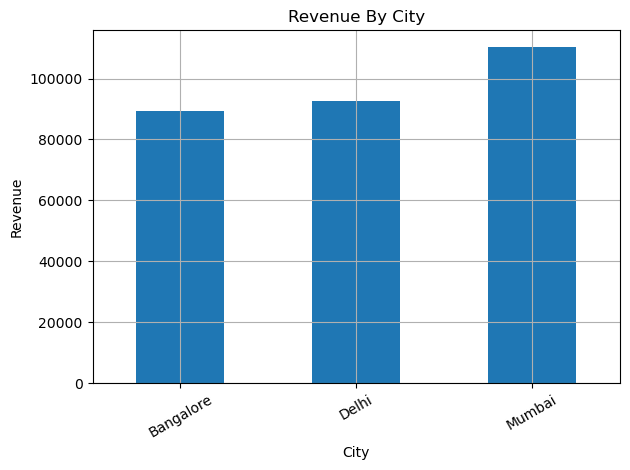

In [24]:
import matplotlib.pyplot as plt
total_revenue_byCity.plot(kind="bar", title="Revenue By City")
plt.xlabel("City")
plt.ylabel("Revenue")
plt.grid(True)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Insight:
# Mumbai generates the highest total revenue among all cities,
# indicating stronger sales performance compared to Delhi and Bangalore.

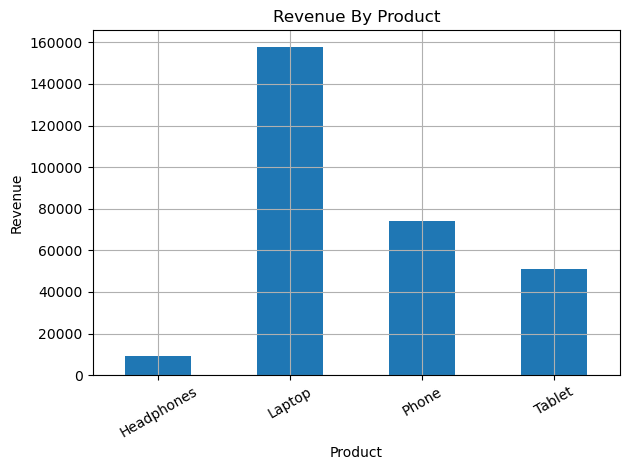

In [25]:
total_revenue_byProduct.plot(kind="bar", title="Revenue By Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.grid(True)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Insight:
# Laptops contribute the highest revenue among all products,
# indicating strong demand, while other products show comparatively lower contribution.

## Conclusion
### - Mumbai is the highest revenue-generating city.
### - Laptop sales dominate total revenue.

In [26]:
df.to_csv("Sales_data.csv", index=False)